# Movie Recommendation System (IMDb Indonesian Movies)

## Project Overview

Dalam proyek ini, pendekatan utama yang akan digunakan adalah content-based filtering dengan memanfaatkan teknik TF-IDF (Term Frequency-Inverse Document Frequency) dan cosine similarity untuk menganalisis kemiripan antar film berdasarkan fitur-fitur seperti genre, aktor, dan deskripsi film. Pendekatan ini dipilih karena kemampuannya dalam memberikan rekomendasi yang relevan bahkan tanpa data interaksi pengguna yang ekstensif.

| Fitur/Variabel   | Deskripsi                                        | Tipe Data   |
|------------------|--------------------------------------------------|-------------|
| title            | Judul film                                       | object      |
| year             | Tahun rilis film                                 | int64       |
| description      | Deskripsi singkat film                           | object      |
| genre            | Genre film (16 kategori)          | object      |
| rating           | Rating usia penonton (12 kategori)               | object      |
| users_rating     | Rating pengguna IMDb (skala 1–10)                | float64     |
| votes            | Jumlah vote IMDb                                 | object      |
| languages        | Bahasa yang digunakan dalam film                 | object      |
| directors        | Nama sutradara film                              | object      |
| actors           | Daftar aktor yang membintangi film              | object      |
| runtime          | Durasi film                                      | object      |

**Sumber Data:**
[**IMDb Indonesian Movies**](https://www.kaggle.com/datasets/dionisiusdh/imdb-indonesian-movies/data) (Kaggle)

## Import Library

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack


import warnings
warnings.filterwarnings ('ignore')

In [101]:
# Memuat Dataset
df = pd.read_csv('indonesian_movies.csv')
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


## Exploratory Data Analysis

### Deskripsi Variabel

In [102]:
# Melihat Bentuk Data (Shape)
print('Data Shape:', df.shape)

# Melihat Informasi Dataset
print('\nInformasi Movies Dataset:')
df.info()

# Melihat Statistik Deskriptif Dataset
print('\nStatistik Deskriptif (Kolom Numerik) Movies Dataset:')
df.describe()

Data Shape: (1272, 11)

Informasi Movies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB

Statistik Deskriptif (Kolom Numerik) Movies Dataset:


,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


**Insight**

- Terdapat 1272 Data dan 11 Kolom.
- Terdapat nilang yang hilang atau *missing values*

**🎬 Tahun Rilis (`year`)**
- Jumlah data untuk tahun rilis adalah **1272 film**.
- Rata-rata tahun rilis film adalah sekitar **2007**.
- Sebagian besar film dalam dataset ini dirilis antara tahun **2006** (kuartil pertama) dan **2016** (kuartil ketiga).
- Rentang tahun rilis cukup lebar, dari tahun **1926 hingga 2020**, menunjukkan adanya film-film klasik hingga film yang relatif baru.
- Median tahun rilis adalah **2011**, yang sedikit lebih tinggi dari rata-rata, mengindikasikan kemungkinan adanya lebih banyak film yang dirilis pada paruh kedua periode waktu dalam dataset.

**⭐ Rating Pengguna (`users_rating`)**
- Jumlah data rating pengguna adalah **1272**, namun sebelumnya disebutkan 6144, kemungkinan terjadi kesalahan atau merujuk pada total skor atau vote dari sumber eksternal (perlu klarifikasi).
- Rata-rata rating pengguna adalah sekitar **6.14**.
- Sebagian besar rating pengguna berada di antara **5.3** (kuartil pertama) dan **7.1** (kuartil ketiga).
- Rentang rating cukup luas, dari **1.2 hingga 9.4**, menunjukkan variasi preferensi pengguna yang signifikan.
- Median rating adalah **6.4**, yang sedikit lebih tinggi dari rata-rata, mengindikasikan distribusi rating yang mungkin sedikit condong ke nilai yang lebih tinggi.

In [103]:
# Statistik Deskriptif untuk Kolom Kategorikal
print('\nStatistik Deskriptif (Kolom Kategorik) Movies Dataset:')
df.describe(include=['object'])


Statistik Deskriptif (Kolom Kategorik) Movies Dataset:


,title,description,genre,rating,votes,languages,directors,actors,runtime
count,1272,840,1236,376,1272,1272,1265,1272,869
unique,1262,840,15,11,312,8,377,1266,85
top,Kuntilanak 2,It tells the story of an Indonesian revolution...,Drama,13+,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,1,456,161,58,1241,61,4,109


**Insight**

**🎞️ Judul (`title`)**
- Terdapat **1272** judul film dalam dataset.
- Terdapat **1262** judul yang unik.
- Judul **"Kuntilanak 2"** muncul paling sering (**frekuensi 2**), yang bisa mengindikasikan adanya sekuel atau kemungkinan duplikasi/kesalahan data.

**📝 Deskripsi (`description`)**
- Terdapat **840** deskripsi yang tersedia, semuanya bersifat **unik**.
- Deskripsi yang muncul pertama secara statistik adalah:  
  _"It tells the story of an Indonesian revolution..."_

**🎭 Genre (`genre`)**
- Dataset mencakup **15** genre yang berbeda.
- Genre paling dominan adalah **"Drama"** dengan **frekuensi 456**.

**🔞 Rating Usia (`rating`)**
- Terdapat **11** kategori rating usia yang berbeda.
- Rating **"13+"** adalah yang paling sering muncul, sebanyak **161** kali.

**🌐 Bahasa (`languages`)**
- Film dalam dataset menggunakan **8** bahasa yang berbeda.
- Bahasa **"Indonesian"** adalah yang paling umum digunakan, muncul pada **1241** film.

**🎬 Sutradara (`directors`)**
- Terdapat **377** nama sutradara yang berbeda.
- Sutradara dengan jumlah film terbanyak adalah **Nayato Fio Nuala** (**frekuensi 61**).

**👥 Aktor (`actors`)**
- Terdapat **1272** data aktor, namun ada **nilai-nilai tidak lengkap atau tidak valid**.
- Kombinasi aktor **"[nan, nan, nan, nan, nan]"** muncul paling sering (**frekuensi 4**), menunjukkan kemungkinan masalah dalam pengisian data.

**⏱️ Durasi (`runtime`)**
- Terdapat **85** nilai durasi yang unik.
- Durasi yang paling umum adalah **"90 min"**, muncul sebanyak **109** kali.

In [104]:
# Mengecek Duplikasi Data
print('Jumlah Duplikasi:', df.duplicated().sum())

Jumlah Duplikasi: 0


**Insight**

Tidak terdapat Nilai atau Data yang Terduplikasi.

In [105]:
# Mengecek kolom apa saja yang nilainya hilang
missing_values = df.isnull().sum()
print("\nJumlah nilai hilang per kolom:")
print(missing_values)

# Untuk presetanse missing valuenya
total_rows = df.shape[0]
missing_percentage = (missing_values / total_rows) * 100
print("\nPersentase nilai hilang per kolom:")
missing_percentage


Jumlah nilai hilang per kolom:
title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

Persentase nilai hilang per kolom:


title            0.000000
year             0.000000
description     33.962264
genre            2.830189
rating          70.440252
users_rating     0.000000
votes            0.000000
languages        0.000000
directors        0.550314
actors           0.000000
runtime         31.682390
dtype: float64

**Insight**

Kolom **description, genre, rating, directors, dan runtime** memiliki *missing values*.

### Univariate Analysis

Distribusi Genre:
           jumlah sampel  persentase
genre                               
Drama                456        36.9
Comedy               287        23.2
Horror               231        18.7
Action               132        10.7
Adventure             49         4.0
Biography             28         2.3
Thriller              12         1.0
Romance               11         0.9
Fantasy               10         0.8
Crime                  9         0.7
Animation              4         0.3
Family                 2         0.2
Sci-Fi                 2         0.2
War                    2         0.2
History                1         0.1


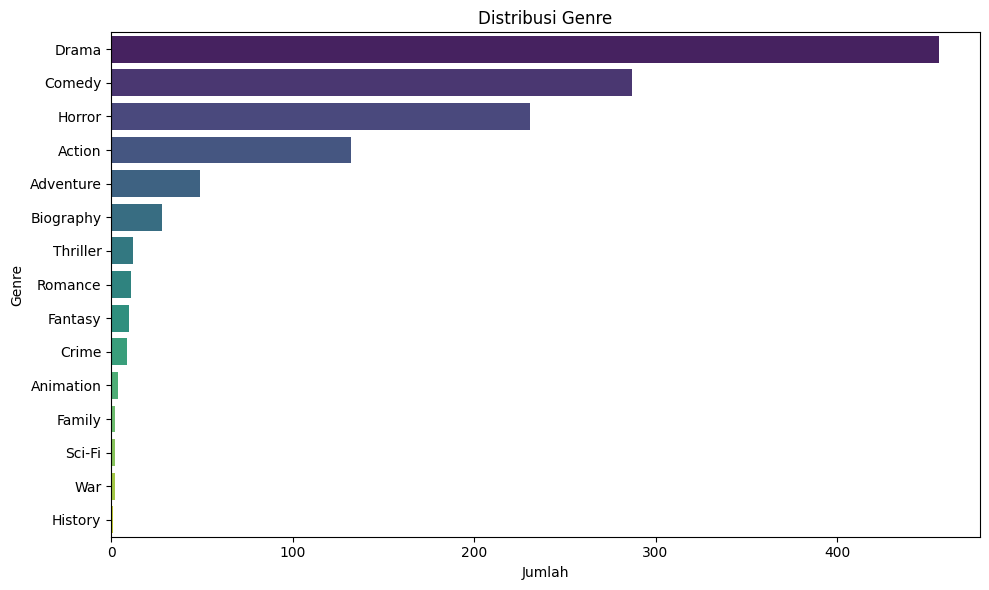

In [ ]:
# Distribus Genre
feature = 'genre'
genre_counts = df[feature].value_counts()
genre_percent = 100 * df[feature].value_counts(normalize=True)
df_genre = pd.DataFrame({'jumlah sampel': genre_counts, 'persentase': genre_percent.round(1)})

print("Distribusi Genre:")
print(df_genre)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette="viridis")
plt.title(f'Distribusi {feature.capitalize()}') 
plt.ylabel(feature.capitalize())
plt.xlabel('Jumlah')
plt.tight_layout()
plt.show()

**Insight**

**🎭 Dominasi Genre Drama**
- Genre **"Drama"** memiliki jumlah sampel terbanyak secara signifikan, yaitu **456 film**, yang mencakup sekitar **36.9%** dari total data genre yang tersedia.
- Hal ini menunjukkan bahwa **drama merupakan genre yang sangat dominan** dalam dataset ini.

**😂😱 Popularitas Comedy dan Horror**
- Genre **"Comedy"** dan **"Horror"** juga cukup populer:
  - **Comedy**: 287 film (**23.2%**)
  - **Horror**: 231 film (**18.7%**)
- Kedua genre ini menempati posisi setelah Drama dan jauh lebih tinggi dibandingkan genre-genre lainnya.

**🔫 Action sebagai Genre Signifikan**
- Genre **"Action"** berada di posisi keempat dengan **132 film** (**10.7%**).
- Ini menunjukkan bahwa genre aksi juga cukup banyak diwakili dalam dataset.

**🌍 Genre dengan Representasi Sedang**
- Genre dengan jumlah sampel menengah:
  - **Adventure**: 49 film (**4.0%**)
  - **Biography**: 28 film (**2.3%**)
- Meskipun tidak sebanyak empat genre teratas, keduanya memiliki representasi yang lebih tinggi dibandingkan genre-genre minor.

**⚠️ Minimnya Representasi Beberapa Genre**
- Beberapa genre memiliki representasi yang sangat kecil dalam dataset:
  - **Thriller**, **Romance**, **Fantasy**, **Crime**, **Animation**, **Family**, **Sci-Fi**, **War**, dan **History** semuanya berada di bawah atau sedikit di atas **1%** dari total data genre.
- Hal ini menunjukkan bahwa genre-genre tersebut **kurang dominan** atau **jarang muncul** dalam koleksi film pada dataset ini.

Distribusi Tahun Rilis Film:
      jumlah sampel  persentase
year                           
2019            111         8.7
2018             97         7.6
2009             79         6.2
2011             78         6.1
2008             77         6.1
...             ...         ...
1953              1         0.1
1951              1         0.1
1950              1         0.1
1928              1         0.1
1926              1         0.1

[62 rows x 2 columns]


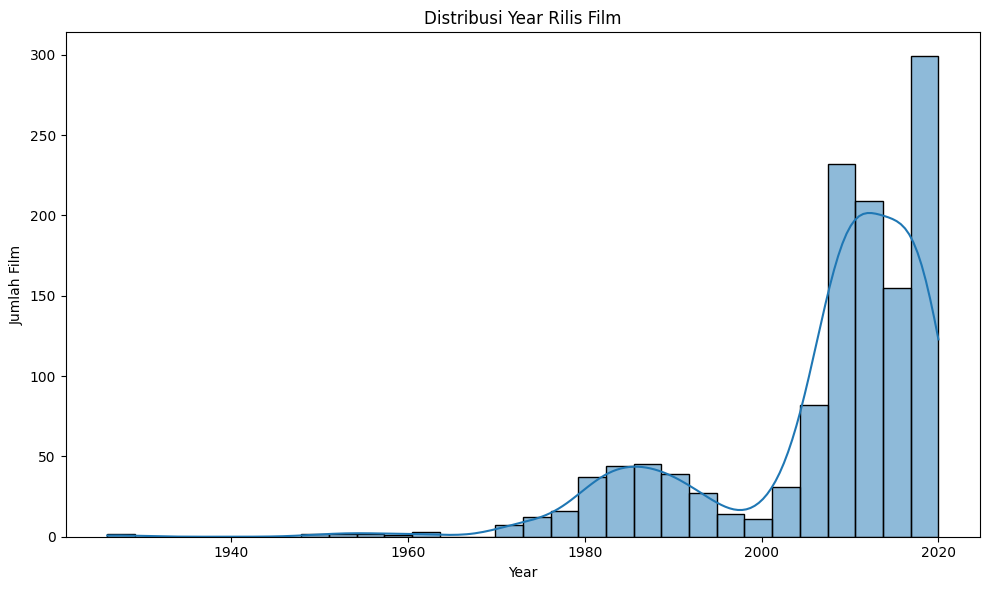

In [107]:
# Distribusi Tahun Rilis Film
feature = 'year'
year_counts = df[feature].value_counts() 
year_percent = 100 * df[feature].value_counts(normalize=True) 
df_year_sorted = pd.DataFrame({'jumlah sampel': year_counts, 'persentase': year_percent.round(1)}).sort_values(by='jumlah sampel', ascending=False)

print("Distribusi Tahun Rilis Film:")
print(df_year_sorted)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=feature, bins=30, kde=True)
plt.title(f'Distribusi {feature.capitalize()} Rilis Film')
plt.xlabel(feature.capitalize())
plt.ylabel('Jumlah Film')
plt.tight_layout()
plt.show()

**Insight**

**📈 Konsentrasi Rilis Film Terbaru**
- Sebagian besar film dalam dataset dirilis dalam beberapa tahun terakhir.
- Tahun dengan jumlah rilis terbanyak:
  - **2019**: 111 film (**8.7%**)
  - **2018**: 97 film (**7.6%**)
  - **2009**: 79 film (**6.2%**)
  - **2011**: 78 film (**6.1%**)
  - **2008**: 77 film (**6.1%**)

**🔼 Peningkatan Jumlah Rilis Seiring Waktu**
- Visualisasi histogram menunjukkan adanya tren **peningkatan jumlah film** yang dirilis dari waktu ke waktu.
- **Lonjakan signifikan** terjadi setelah tahun **2000**, menandakan era kebangkitan produksi film yang lebih intensif.

**🏔️ Puncak Rilis di Era Modern**
- Distribusi memuncak di sekitar tahun **2010-an**, sesuai dengan frekuensi data rilis tertinggi dalam tabel.
- Ini menunjukkan bahwa **dekade 2010-an adalah era paling produktif** dalam dataset ini.

**📉 Rilis Film Awal yang Jarang**
- Film-film yang dirilis pada paruh pertama abad ke-20 sangat sedikit.
- Beberapa tahun seperti **1953**, **1951**, **1950**, **1928**, dan **1926** hanya memiliki **1 film** masing-masing (**0.1%** dari total data), menunjukkan keterbatasan arsip atau cakupan data pada era tersebut.

**⚖️ Distribusi yang Tidak Merata**
- Secara umum, **distribusi tahun rilis sangat tidak merata**.
- Konsentrasi rilis **tertinggi** terjadi dalam **dua dekade terakhir**, dengan jumlah film jauh lebih banyak dibandingkan periode sebelumnya.

**🧭 Adanya Periode dengan Jumlah Rilis Sedang**
- Sekitar tahun **1980-an dan 1990-an** terdapat **peningkatan sedang** dalam jumlah film, lebih tinggi dibandingkan era sebelum 1970-an, namun masih rendah dibandingkan era modern.

5 Rating Film Teratas:
              jumlah sampel  persentase
users_rating                           
7.2                      54         4.2
6.2                      52         4.1
6.6                      50         3.9
7.0                      48         3.8
6.8                      45         3.5


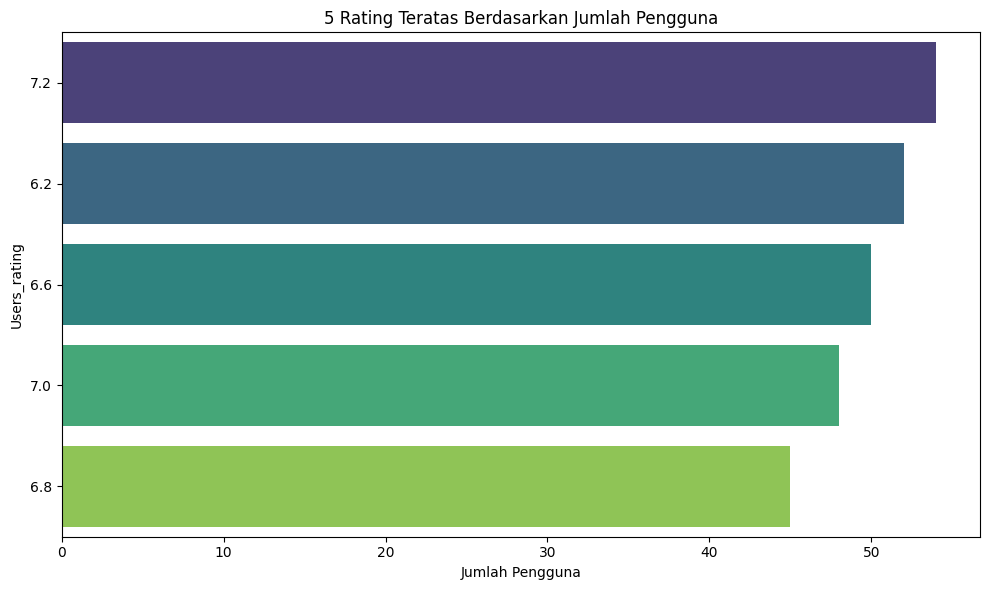

In [108]:
# Distribusi User Rating (5 Teratas)
feature = 'users_rating'
rating_counts = df[feature].value_counts()
top_5_ratings = rating_counts.nlargest(5)

df_top_5_ratings = pd.DataFrame({'jumlah sampel': top_5_ratings, 'persentase': (100 * top_5_ratings / len(df)).round(1)})

print("5 Rating Film Teratas:")
print(df_top_5_ratings)

# Visualisasi 5 Rating Teratas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=feature, order=top_5_ratings.index, palette="viridis")
plt.title(f'5 Rating Teratas Berdasarkan Jumlah Pengguna')
plt.ylabel(feature.capitalize())
plt.xlabel('Jumlah Pengguna')
plt.tight_layout()
plt.show()

**Insight**

**🥇 Rating 7.2 Paling Banyak Dipilih**
- **Rating 7.2** merupakan rating yang **paling banyak diberikan oleh pengguna** dalam dataset ini.
- Terdapat **54 film** (sekitar **4.2%** dari total) yang memiliki rating ini.

**🥈 Rating 6.2 dan 6.6 Cukup Populer**
- **Rating 6.2** diberikan pada **52 film** (**4.1%**).
- **Rating 6.6** diberikan pada **50 film** (**3.9%**).
- Kedua rating ini sangat dekat frekuensinya dengan rating 7.2, menunjukkan **popularitas yang tinggi**.

**🥉 Rating 7.0 dan 6.8 Mengikuti**
- **Rating 7.0** muncul pada **48 film** (**3.8%**).
- **Rating 6.8** muncul pada **45 film** (**3.5%**).
- Kedua rating ini melengkapi **lima besar** rating terbanyak dalam dataset.

## Data Preparation

- Menerapkan dan menyebutkan teknik data preparation yang dilakukan.
- Teknik yang digunakan pada notebook dan laporan harus berurutan.
- Menjelaskan proses data preparation yang dilakukan.
- Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

### Drop Kolom

Tahap ini bertujuan untuk mengurangi noise dan kompleksitas data dengan menghapus kolom yang tidak memberikan kontribusi signifikan terhadap sistem rekomendasi.

In [109]:
# Drop Kolom yang Tidak Relevan
df.drop(columns=['rating', 'votes', 'languages', 'runtime'], inplace=True)

### Handling Missing Values

Tahap ini bertujuan untuk mengisi nilai yang hilang (NaN) pada kolom-kolom yang akan digunakan dalam pemodelan, untuk meningkatkan kualitas dan keandalan data.

In [110]:
# Menangani Missing Value
df['title'].fillna('', inplace=True)
df['description'].fillna('', inplace=True)
df['actors'].fillna('', inplace=True)
df['genre'].fillna('Tidak Diketahui', inplace=True)
df['users_rating'].fillna(df['users_rating'].median(), inplace=True)

### Preprocessing

Tahap ini bertujuan untuk menyiapkan representasi fitur yang relevan untuk perhitungan kesamaan antar film dan menghitung kesamaan antar film berdasarkan representasi fitur gabungan.

In [111]:
def prepare_features(df):
    # Gabungkan kolom teks
    text_data = df['genre'] + ' ' + df['actors'] + ' ' + df['description']

    # 1. TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')  
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # 2. Scaling numerik: year dan users_rating
    scaler = MinMaxScaler()
    year_scaled = scaler.fit_transform(df[['year']])
    rating_scaled = scaler.fit_transform(df[['users_rating']])

    # 3. Gabungkan semua ke dalam satu matrix
    combined_matrix = hstack((tfidf_matrix, year_scaled, rating_scaled))

    return combined_matrix, tfidf_vectorizer
combined_matrix, tfidf_vectorizer = prepare_features(df)

# Menghitung Similarity
sim_matrix = cosine_similarity(combined_matrix, combined_matrix)

## Modeling

Tahapan ini membahas model sistem rekomendasi yang dibuat untuk memberikan rekomendasi film kepada pengguna. Sistem ini menggunakan pendekatan Content-Based Filtering untuk merekomendasikan film yang mirip dengan film yang telah disukai atau ditonton sebelumnya.

### Content-Based-Filtering

In [112]:
# Fungsi Rekomendasi Film
def get_movie_recommendations(movie_title, df, sim_matrix, n_recommendations=5):
    try:
        idx = df[df['title'].str.lower() == movie_title.lower()].index[0]
    except IndexError:
        print(f"Film dengan judul '{movie_title}' tidak ditemukan dalam dataset.")
        return pd.DataFrame()
    else:
        sim_scores = list(enumerate(sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        movie_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]
        scores = [i[1] for i in sim_scores[1:n_recommendations+1]]
        
        recommendations = df.iloc[movie_indices][['title', 'description', 'genre', 'actors', 'year', 'users_rating']].copy()
        recommendations['similarity_score'] = scores
        return recommendations

## Evaluation

Bagian ini menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja sistem rekomendasi dan hasil evaluasinya.

In [113]:
# Fungsi Evaluasi Metrik
def evaluate_genre_precision_at_k(recommended_movies, relevant_genres, k=3):
    if recommended_movies.empty:
        return 0.0

    top_k_recommendations = recommended_movies.head(k)
    relevant_and_recommended_count = 0

    for genre_str in top_k_recommendations['genre']:
        genre_list = [g.strip() for g in genre_str.split(',')]
        if any(g in relevant_genres for g in genre_list):
            relevant_and_recommended_count += 1

    precision_at_k = relevant_and_recommended_count / k if k > 0 else 0.0
    return precision_at_k

In [114]:
# Contoh Penerapan Sistem Rekomendasi Film
movie_title = 'Dilan 1991'
recommendations = get_movie_recommendations(movie_title, df, sim_matrix)
print("Rekomendasi Film:", movie_title)
display(recommendations)

relevant_genres = ['Drama', 'Romance']
precision_at_k = evaluate_genre_precision_at_k(recommendations, relevant_genres, k=3)
print(f'\nPrecision@3 (Genre): {precision_at_k:.2f}')

Rekomendasi Film: Dilan 1991


,title,description,genre,actors,year,users_rating,similarity_score
11,Milea,Milea made the decision to part with Dilan as ...,Drama,"['Iqbaal Dhiafakhri Ramadhan', 'Vanesha Presci...",2020,6.1,0.761454
160,Dilan 1990,Milea (Vanesha Prescilla) met with Dilan (Iqba...,Drama,"['Iqbaal Dhiafakhri Ramadhan', 'Vanesha Presci...",2018,7.3,0.740067
131,#FriendButMarried,Ayudia (Vanesha Prescilla) and Ditto (Adipati ...,Biography,"['Adipati Dolken', 'Vanesha Prescilla', 'Refal...",2018,6.9,0.641758
9,Mariposa,Iqbal (Angga Yunanda) is like a Mariposa butte...,Drama,"['Angga Yunanda', 'Adhisty Zara', 'Dannia Sals...",2020,8.5,0.633936
174,Keluarga Cemara,"After the bankruptcy, Abah loses his house and...",Drama,"['Nirina Zubir', 'Ringgo Agus Rahman', 'Adhist...",2018,7.9,0.631335



Precision@3 (Genre): 0.67


### Insight: Hasil Rekomendasi dan Evaluasi Genre

Output ini menyajikan hasil konkret dari sistem rekomendasi untuk film **'Dilan 1991'** dan evaluasi kinerjanya menggunakan metrik Precision@k berdasarkan genre.

**Temuan dari Rekomendasi:**

1.  **Relevansi Tinggi:** Rekomendasi teratas adalah **'Milea'** dan **'Dilan 1990'**, yang merupakan sekuel dan prekuel langsung dari film input. Skor kemiripan yang tinggi (0.76 dan 0.74) menunjukkan model berhasil mengidentifikasi hubungan konten yang sangat kuat (kemungkinan besar dari deskripsi, aktor, judul, dan genre yang sama).
2.  **Kemiripan Lainnya:** Film seperti '#FriendButMarried', 'Mariposa', dan 'Keluarga Cemara' muncul berikutnya. Kemiripan mereka (skor ~0.63-0.64) mungkin berasal dari kombinasi genre (Drama), aktor yang sama (Vanesha Prescilla, Adhisty Zara), tema dalam deskripsi, atau kedekatan dalam rating pengguna.
3.  **Skor Menurun:** Skor kemiripan menurun secara wajar seiring peringkat rekomendasi, yang diharapkan.

**Temuan dari Evaluasi (Precision@3 Genre):**

1.  **Konteks:** Evaluasi ini mengukur seberapa banyak dari **3 rekomendasi teratas** yang termasuk dalam genre yang dianggap relevan (dalam kasus ini, **'Drama'** atau **'Romance'**).
2.  **Perhitungan:**
    * Top 3 Rekomendasi: 'Milea' (Genre: Drama), 'Dilan 1990' (Genre: Drama), '#FriendButMarried' (Genre: Biography).
    * Genre yang Relevan di Top 3: 'Drama', 'Drama' (2 film).
    * Precision@3 = (Jumlah Rekomendasi Relevan di Top 3) / 3 = 2 / 3 ≈ 0.67.
3.  **Makna:** Skor **Precision@3 ≈ 0.67** menunjukkan bahwa **dua pertiga** dari rekomendasi teratas untuk 'Dilan 1991' sesuai dengan kriteria genre yang diinginkan ('Drama' atau 'Romance').

**Insight Keseluruhan:**

Kombinasi output rekomendasi dan evaluasi ini memberikan gambaran:

* **Efektivitas Model:** Model berbasis konten ini efektif dalam menemukan film yang sangat mirip (seperti dalam satu seri).
* **Relevansi Genre:** Model menunjukkan kemampuan yang cukup baik (presisi 67% di 3 teratas) dalam merekomendasikan film dengan genre yang dianggap relevan ('Drama'/'Romance') untuk contoh spesifik ini. Ini mengindikasikan bahwa fitur yang digunakan (teks + rating) secara tidak langsung juga menangkap preferensi genre.